In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("income.csv")

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


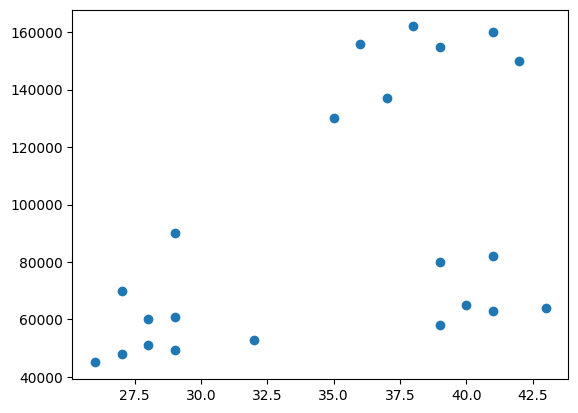

In [5]:
plt.scatter(df['Age'], df['Income($)'])

In [6]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [7]:
y_pred = kmean.fit_predict(df[['Age', 'Income($)']])

d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [13]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


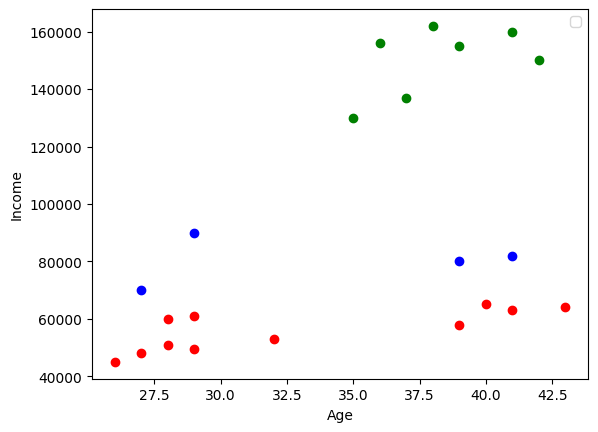

In [21]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0['Age'], df0['Income($)'], color = "red")
plt.scatter(df1['Age'], df1['Income($)'], color = "green")
plt.scatter(df2['Age'], df2['Income($)'], color = "blue")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

the red and blue group are not clustered properly.
therefore data should be sclaed properly else the clustering won't happen 

In [27]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [29]:
df['Income($)0']= scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster,Income($)0
0,Rob,27,70000,2,0.213675
1,Michael,29,90000,2,0.384615
2,Mohan,29,61000,0,0.136752
3,Ismail,28,60000,0,0.128205
4,Kory,42,150000,1,0.897436
5,Gautam,39,155000,1,0.940171
6,David,41,160000,1,0.982906
7,Andrea,38,162000,1,1.000000
8,Brad,36,156000,1,0.948718
9,Angelina,35,130000,1,0.726496


In [30]:
scaler.fit(df[['Age']])
df['Age0'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster,Income($)0,Age0
0,Rob,27,70000,2,0.213675,0.058824
1,Michael,29,90000,2,0.384615,0.176471
2,Mohan,29,61000,0,0.136752,0.176471
3,Ismail,28,60000,0,0.128205,0.117647
4,Kory,42,150000,1,0.897436,0.941176
5,Gautam,39,155000,1,0.940171,0.764706
6,David,41,160000,1,0.982906,0.882353
7,Andrea,38,162000,1,1.000000,0.705882
8,Brad,36,156000,1,0.948718,0.588235
9,Angelina,35,130000,1,0.726496,0.529412


In [31]:
km = KMeans(n_clusters= 3)
y_pred1 = km.fit_predict(df[['Age0', 'Income($)0']])
df['new_pred'] = y_pred1
df

d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Age,Income($),cluster,Income($)0,Age0,new_pred
0,Rob,27,70000,2,0.213675,0.058824,1
1,Michael,29,90000,2,0.384615,0.176471,1
2,Mohan,29,61000,0,0.136752,0.176471,1
3,Ismail,28,60000,0,0.128205,0.117647,1
4,Kory,42,150000,1,0.897436,0.941176,0
5,Gautam,39,155000,1,0.940171,0.764706,0
6,David,41,160000,1,0.982906,0.882353,0
7,Andrea,38,162000,1,1.000000,0.705882,0
8,Brad,36,156000,1,0.948718,0.588235,0
9,Angelina,35,130000,1,0.726496,0.529412,0


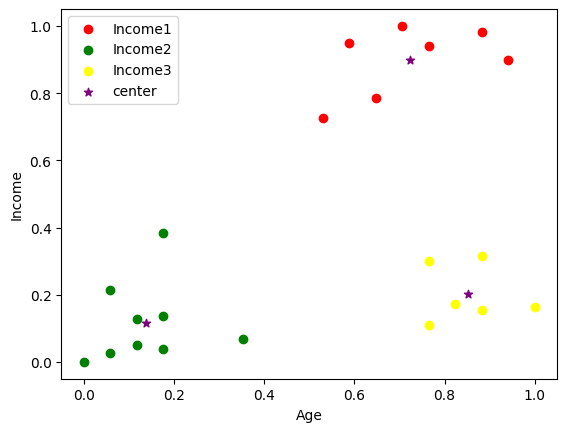

In [39]:
df_1 = df[df['new_pred'] == 0]
df_2 = df[df['new_pred'] == 1]
df_3 = df[df['new_pred'] == 2]

plt.scatter(df_1['Age0'], df_1['Income($)0'], color = "red", label = "Income1")
plt.scatter(df_2['Age0'], df_2['Income($)0'], color = "green", label = "Income2")
plt.scatter(df_3['Age0'], df_3['Income($)0'], color = "yellow", label = "Income3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = "purple", marker = "*", label = "center")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [36]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

How to select K using elbow Method

In [41]:
k_cluster = range(1, 10)
sse =[]

for k in k_cluster:
    km=KMeans(n_clusters=k).fit(df[['Age0', 'Income($)0']])
    sse.append(km.inertia_)
sse

d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Automation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarni

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3625079900797329,
 0.26640301246684156,
 0.2203764169077067,
 0.16869711728567788,
 0.1327661931978319,
 0.10497488680620909]

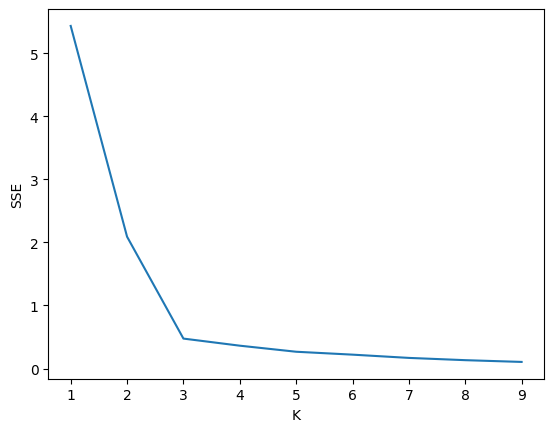

In [42]:
#plot the sse to see elbow
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_cluster, sse)

So from above graph our k = 3
and thats what we have to select while doing clustering